In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn import decomposition
from sklearn import datasets

In [3]:
df = pd.read_csv("iris.csv")
df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,target
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:, features].values

y = df.loc[:,['target']].values

x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
n=pca.explained_variance_ratio_

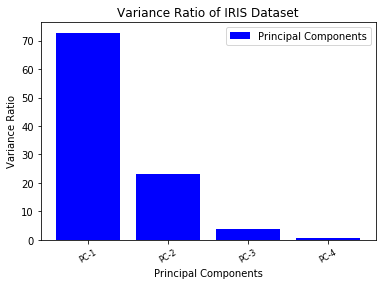

In [5]:
plt.bar([1,2,3,4],list(n*100),label='Principal Components',color='b')
plt.legend()
plt.xlabel('Principal Components')
plt.xticks([1,2,3,4],['PC-1','PC-2','PC-3','PC-4'], fontsize=8, rotation=30)
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio of IRIS Dataset')
plt.show()

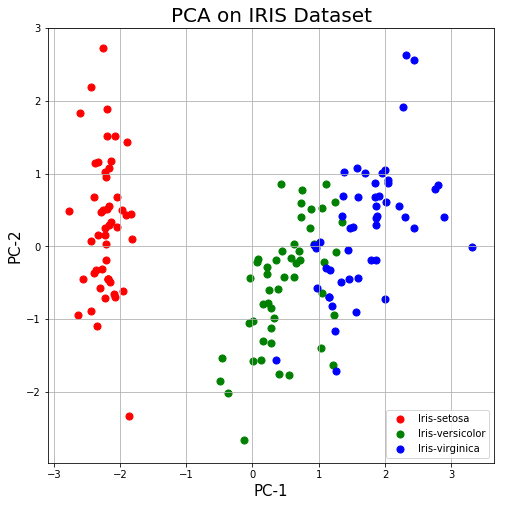

In [6]:
#---------------------------------------------------
# *Since the initial 2 principal components have high variance.
#   so, we select pc-1 and pc-2.
#---------------------------------------------------
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC-1', 'PC-2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC-1', fontsize = 15)
ax.set_ylabel('PC-2', fontsize = 15)
ax.set_title('PCA on IRIS Dataset', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC-1']
               , finalDf.loc[indicesToKeep, 'PC-2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show() 